<BarContainer object of 3 artists>

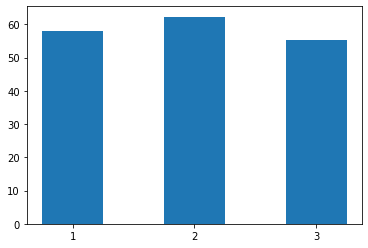

In [1]:
# Part I: A/B Testing Sales Promotion Strategies

# A. Generate a barplot to show the average SalesInThousands values, separated by the different 
# promotion types.

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statistics import mean
from scipy import stats

cd = pd.read_csv('campaign_data.csv')

a = cd[cd['Promotion'] < 2] # promotion 1 
b = cd[cd['Promotion'] == 2] # promotion 2 
c = cd[cd['Promotion'] > 2] # promotion 3 

data = {'1': mean(a['SalesInThousands']),  
        '2': mean(b['SalesInThousands']), 
        '3': mean(c['SalesInThousands'])}  

x = list(data.keys())
y = list(data.values())

plt.bar(x, y, width = 0.5)

a. Describe your barplot in 1-2 sentences.

From the barplot, we can tell promotion 2 has the highest average sales in thousands, promotion 3 has the lowest average sales in thousands. 

In [2]:
# B. You want to make sure that the promotions were evenly-balanced across time. 
# Create another barplot -- this time, build a barplot that shows the number of instances in 
# which each of the promotions was held. Include the ‘week’ variable in your plot, too.

# Promotion 1
d1 = a[a['week'] == 1]
e1 = a[a['week'] == 2]
f1 = a[a['week'] == 3]
g1 = a[a['week'] == 4]

# Promotion 2
d2 = b[b['week'] == 1]
e2 = b[b['week'] == 2]
f2 = b[b['week'] == 3]
g2 = b[b['week'] == 4]

# Promotion 3
d3 = c[c['week'] == 1]
e3 = c[c['week'] == 2]
f3 = c[c['week'] == 3]
g3 = c[c['week'] == 4]

d1.count() # 43
d2.count() # 47
d3.count() # 47

e1.count() # 43
e2.count() # 47
e3.count() # 47

f1.count() # 43
f2.count() # 47
f3.count() # 47

g1.count() # 43
g2.count() # 47
g3.count() # 47

MarketID            47
MarketSize          47
LocationID          47
AgeOfStore          47
Promotion           47
week                47
SalesInThousands    47
dtype: int64

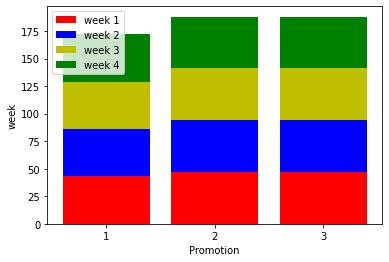

In [3]:
x = ['1', '2', '3']
y1 = np.array([43, 47, 47]) # d1, d2, d3
y2 = np.array([43, 47, 47]) # e1, e2, e3
y3 = np.array([43, 47, 47]) # f1, f2, f3
y4 = np.array([43, 47, 47]) # g1, g2, g3

plt.bar(x, y1, color = 'r')
plt.bar(x, y2, bottom = y1, color = 'b')
plt.bar(x, y3, bottom = y1 + y2, color = 'y')
plt.bar(x, y4, bottom = y1 + y2 + y3, color = 'g')
plt.xlabel("Promotion")
plt.ylabel("week")
plt.legend(["week 1", "week 2", "week 3", "week 4"])
plt.show()

a. What does this show you about the experiment design? Do you think the ‘week’ could be a confounding variable in the experiment?

Promotion 1 was held 43 times from week 1 to week 4, and promotion 2 and 3 was held 47 times from week 1 to week 4. I do not think the 'week' could be a confounding variable in the experiment, because both promotion 2 and 3 was held 47 times each week but the average sales in thousands were totally different. 

In [4]:
# C. Next, generate some summary stats here -- group the observations by ‘Promotion’ and then 
# describe the store ages.

cd.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


a. How would you describe these results in general? You won’t use a statistical test here, but instead, just summarize what this seems to show -- does the age profile of the stores seem to be very different, or does it look like it’s pretty similar across these three groups?

The average age of store for promotion 1 is 8.28, the average age of store for promotion 2 is 7.98, and the average age of store for promotion 3 is 9.23. The max age of store for promotion 1 is 27, the max age of store for promotion 2 is 28, and the max age of store for promotion 3 is 24. The age profile of the stores seem to be pretty similar across these three groups. 

In [5]:
# D. Using an appropriate statistical test for each comparison, compare every possible 
# promotion (Promotion 1 vs. Promotion 2, Promotion 2 vs. Promotion 3, and Promotion 1 vs. 
# Promotion 3) to assess its impact on sales.

t, p = stats.ttest_ind(cd.loc[cd['Promotion'] == 1, 'SalesInThousands'].values, 
                       cd.loc[cd['Promotion'] == 2, 'SalesInThousands'].values, 
                       equal_var=False)

In [6]:
t

-2.512859893840587

In [7]:
p

0.012428715478592204

In [8]:
t, p = stats.ttest_ind(cd.loc[cd['Promotion'] == 2, 'SalesInThousands'].values, 
                       cd.loc[cd['Promotion'] == 3, 'SalesInThousands'].values, 
                       equal_var=False)

In [9]:
t

4.2191398016523785

In [10]:
p

3.088085195537442e-05

In [11]:
t, p = stats.ttest_ind(cd.loc[cd['Promotion'] == 1, 'SalesInThousands'].values, 
                       cd.loc[cd['Promotion'] == 3, 'SalesInThousands'].values, 
                       equal_var=False)

In [12]:
t

1.5560224307758634

In [13]:
p

0.12059147742229478

a. What were the t-statistics and p-statistics for each head-to-head test?

Promotion 1 vs. Promotion 2: t: -2.512859893840587, p: 0.012428715478592204

Promotion 2 vs. Promotion 3: t: 4.2191398016523785, p: 3.088085195537442e-05

Promotion 1 vs. Promotion 3: t: 1.5560224307758634, p: 0.12059147742229478

b. Based on these results, what can you conclude about the promotions?

promotion 1 vs. promotion 2 and promotion2 vs. promotion 3 have p-values are lower than 0.05. It is considered statistically significant. We will reject the null hypothesis that there is no meaningful variation among the promotions. Promotion 1 vs. promotion 3 has p-value greater than 0.05, we failed to reject the null hypothesis that there is no meaningful variation among the promotions. 

Part II: Using a Statistical Test to Evaluate a Claim

In [14]:
# A. Using the results from the first set of dice rolls (in which you rolled the visitor’s 
# dice 60 times), conduct a chi-square goodness of fit test in Python.

from scipy.stats import chisquare

observed = [13, 7, 12, 8, 14, 6]
expected = [10, 10, 10, 10, 10, 10]

chisq, pvalue = chisquare(f_obs = observed, f_exp = expected)
print('The chisquare value is :', chisq)
print('The p-value is :', pvalue)

The chisquare value is : 5.800000000000001
The p-value is : 0.32616881369357226


a. What is the null hypothesis of this test? What is the alternative hypothesis?

The null hypothesis is the probability of each number of the dice is 1/6. The alternative hypothesis is the probability of each number of the dice is not 1/6.  

In [15]:
import scipy.stats

scipy.stats.chi2.ppf(1 - .05, df = 5)

11.070497693516351

b. What is the p-value of this test? Based on this value, what will you conclude? Be sure to mention the null hypothesis in your answer to this question. (you can assume that Lobster Land uses an alpha value of 0.05 for statistical tests)

The p-value is 0.326. The chi-square calculated value is lower than the chi-square critical value, then we failed to reject the null hypothesis.

In [16]:
# B. Now, using only the results from the second set of dice rolls (in which the intern 
# rolled the visitor’s dice 120 times), conduct a chi-square goodness of fit test in Python.

observed = [26, 14, 24, 16, 28, 12]
expected = [20, 20, 20, 20, 20, 20]

chisq, pvalue = chisquare(f_obs = observed, f_exp = expected)
print('The chisquare value is :', chisq)
print('The p-value is :', pvalue)

The chisquare value is : 11.600000000000001
The p-value is : 0.040699388504049985


a. What is the null hypothesis of this test? What is the alternative hypothesis?

The null hypothesis is the probability of each number of the dice is 1/6. The alternative hypothesis is the probability of each number of the dice is not 1/6.

b. What is the p-value of this test? Based on this value, what will you conclude? Be sure to mention the null hypothesis in your answer to this question.

The p-value is 0.041. The chi-square calculated value is greater than the chi-square critical value, then we reject the null hypothesis.

In [17]:
# C. Demonstrate where the two chi-square values used above came from. Use Jupyter Notebook 
# to do this, but do not use any Python libraries or modules. Instead, show the calculation 
# used to determine the chi-square value for each case (the 60-roll trial, and the 120-roll 
# trial).

# 60-roll
(13-10)**2/10+(7-10)**2/10+(12-10)**2/10+(8-10)**2/10+(14-10)**2/10+(6-10)**2/10

5.800000000000001

In [18]:
# 120-roll
(26-20)**2/20+(14-20)**2/20+(24-20)**2/20+(16-20)**2/20+(28-20)**2/20+(12-20)**2/20

11.600000000000001

i. What pattern did you notice in the results, when comparing the observed values from the two trials?

The chi-square value doubled when the number of trials doubled. 

ii. If your chi-square value from the second trial was different from the one you obtained from the first trial, describe in about 1-2 sentences why you think it changed. Just a couple sentences is enough here -- a full credit answer will ‘connect the dots’ between the formula for the chi-square value and the way it was impacted by the data here.

The observed values are doubled in the second trial. Since the number of dice rolled was also doubled, we can tell from the formula that 9/10 is double 36/20. As a result, the chi-square value was doubled in the second trial. 

D. What should Lobster Land tell the traveling salesman? Why?

The Lobster Land could tell the traveling salesman to set up the dice game. Because the second trail has a p-value of 0.04, so we reject null. 

E. If using more dice rolls in the 2nd trial seems to have impacted the results, write a completely intuitive (no math!) explanation for why this might make sense. To write this answer, don’t use any math or statistics references. Instead, be creative, and think about how you might explain to a small child (or an adult that doesn’t know about math) about the impact of having more evidence in order to make the decision here (2-4 sentences here will be enough).

When examing whether a dice is fair, the larger the sample size, the more accurate the result. In the second trial, we double the sample size so we found a more meaningful value. 